# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ibnu Sabil Adriza
- **Email:** ibnusabiladrizaabil@gmail.com
- **ID Dicoding:** abillo

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Kategori produk apa yang menghasilkan pendapatan terbesar bagi perusahaan, dan bagaimana tingkat pembatalan atau retur pada kategori-kategori tersebut?
- Pertanyaan 2
Seberapa signifikan pengaruh keterlambatan pengiriman terhadap skor ulasan yang diberikan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [39]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/ibnusabiladrizaabil-dot/E-commerce-dataset-dicoding-proyek-akhir/refs/heads/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [40]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/ibnusabiladrizaabil-dot/E-commerce-dataset-dicoding-proyek-akhir/refs/heads/main/geolocation_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [41]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/ibnusabiladrizaabil-dot/E-commerce-dataset-dicoding-proyek-akhir/refs/heads/main/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [42]:
order_payment_df = pd.read_csv("https://raw.githubusercontent.com/ibnusabiladrizaabil-dot/E-commerce-dataset-dicoding-proyek-akhir/refs/heads/main/order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [43]:
order_review_df = pd.read_csv("https://raw.githubusercontent.com/ibnusabiladrizaabil-dot/E-commerce-dataset-dicoding-proyek-akhir/refs/heads/main/order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [44]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/ibnusabiladrizaabil-dot/E-commerce-dataset-dicoding-proyek-akhir/refs/heads/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [45]:
product_category_df = pd.read_csv("https://raw.githubusercontent.com/ibnusabiladrizaabil-dot/E-commerce-dataset-dicoding-proyek-akhir/refs/heads/main/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [46]:
products_df = pd.read_csv("https://raw.githubusercontent.com/ibnusabiladrizaabil-dot/E-commerce-dataset-dicoding-proyek-akhir/refs/heads/main/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [47]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/ibnusabiladrizaabil-dot/E-commerce-dataset-dicoding-proyek-akhir/refs/heads/main/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Saya mengupload dataset ke github untuk memudahkan proses gathering data
- Tidak ada kesulitan dalam melakukan proses memuad semua data

### Assessing Data

In [48]:
customers_df.info()

customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [49]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [50]:
geolocation_df.info()
geolocation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [51]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [52]:
order_items_df.info()
order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [53]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [54]:
order_payment_df.info()
order_payment_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [55]:
print("Jumlah duplikasi: ", order_payment_df.duplicated().sum())
order_payment_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [56]:
order_review_df.info()
order_review_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [57]:
print("Jumlah duplikasi: ", order_review_df.duplicated().sum())
order_review_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- xxx
- xxx

In [58]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [59]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [60]:
product_category_df.info()
product_category_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,0
product_category_name_english,0


In [61]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [62]:
products_df.info()
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [63]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [64]:
sellers_df.info()
sellers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [65]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
Hasil Assesing:
customers_df
- dataset bersih
  
geolocation_df
- Terdapat 261.831 duplicate data

order_items_df
- dataset bersih
  
order_payment_df
- dataset bersih

order_review_df
- missing value pada kolom review_comment_title sebanyak 87.656
- missing value pada kolom review_comment_message sebanyak 58.247
- review_creation_date dan review_answer_timestamp bertipe objek (string).

orders_df
- missing value pada kolom order_approved_at sebanyak 160
- missing value pada kolom order_delivered_carrier_date sebanyak 1.783
- missing value pada kolom order_delivered_customer_date sebanyak 2.965

product_category_df
- dataset bersih

products_df
- missing value pada kolom product_category_name, product_name_lengh, product_description_lenght, product_photos_qty sebanyak 610
- missing value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm sebanyak 2

sellers_df
- dataset bersih

1. Insight untuk Pertanyaan Bisnis 1

Data utama yang terlibat: orders_df (status), order_items_df (pendapatan/harga), dan products_df (kategori).

- Ditemukan sebanyak 610 missing value pada kolom product_category_name di dataset produk. Jika data ini dibiarkan kosong (NaN), maka saat Anda menggabungkan (merge) tabel items dan products, pendapatan dari 610 jenis produk ini tidak akan terhitung dalam kategori manapun. Ini bisa mendistorsi analisis "Kategori dengan Pendapatan Terbesar".

2. Insight untuk Pertanyaan Bisnis 2

Data utama yang terlibat: orders_df (waktu pengiriman) dan order_reviews_df (skor).

- Kolom tanggal (seperti order_delivered_customer_date, order_estimated_delivery_date) bertipe data Object (String), bukan Datetime.

- Terdapat 2.965 missing value pada order_delivered_customer_date.

- mustahil menghitung durasi keterlambatan (delay) jika tipe datanya masih teks. Selain itu, pesanan yang belum sampai (tanggal kosong) tidak relevan untuk analisis "pengalaman keterlambatan".

### Cleaning Data

In [66]:
#-- cleaning geolocation_df
geolocation_df = geolocation_df.drop_duplicates()
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


In [67]:
#-- cleaning order_review_df
import pandas as pd
order_review_df['review_comment_title'].fillna("No Title", inplace=True)
order_review_df['review_comment_message'].fillna("No Comment", inplace=True)

cols_to_date = ['review_creation_date', 'review_answer_timestamp']
for col in cols_to_date:
    order_review_df[col] = pd.to_datetime(order_review_df[col])

order_review_df.info()
order_review_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


/tmp/ipython-input-3165142248.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_review_df['review_comment_title'].fillna("No Title", inplace=True)
/tmp/ipython-input-3165142248.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [68]:
#-- cleaning orders_df
import pandas as pd

date_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

anomaly_mask = (orders_df['order_delivered_customer_date'].notnull()) & \
               (orders_df['order_approved_at'].notnull()) & \
               (orders_df['order_delivered_customer_date'] < orders_df['order_approved_at'])
orders_df = orders_df[~anomaly_mask]

inconsistent_mask = (orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isnull())
orders_df = orders_df[~inconsistent_mask]


orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)

orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 99372 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99372 non-null  object        
 1   customer_id                    99372 non-null  object        
 2   order_status                   99372 non-null  object        
 3   order_purchase_timestamp       99372 non-null  datetime64[ns]
 4   order_approved_at              99372 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97590 non-null  datetime64[ns]
 6   order_delivered_customer_date  96415 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99372 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


/tmp/ipython-input-2095312835.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1782
order_delivered_customer_date,2957
order_estimated_delivery_date,0


In [69]:
#-- cleanin products_df
import pandas as pd
products_df['product_category_name'].fillna('unkown', inplace=True)

cols_details = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
products_df[cols_details] = products_df[cols_details].fillna(0)

cols_dimensions = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in cols_dimensions:
    median_val = products_df[col].median()
    products_df[col].fillna(median_val, inplace=True)

products_df.info()
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


/tmp/ipython-input-3578128236.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('unkown', inplace=True)
/tmp/ipython-input-3578128236.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**

Tahapan cleaning:

geolocation_df
- Menggnunakan eknik dropping karena data yang terduplikasi sama persis dan tidak terlalu berpengaruh

order_review_df
- Menggunakan teknik imputasi pada kolom review_comment_title diisi dengan "No Title".
- Menggunakan teknik imputasi pada kolom review_comment_message diisi dengan "No Comment".
- Menganti tipe data pada kolom review_creation_date dan review_answer_timestamp menjadi datetime

orders_df
- Mengganti tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date menjadi datetime
- Menggnunakan teknik imputasi pada kolom order_approved_at diisi dengan data pada kolom order_purchase_timestamp
- Membiarkan kolom order_delivered_customer_date dam order_delivered_carrier_date dibiarkan karena merupakan informasi penting yang menandakan bahwa "Pesanan ini batal" atau "Pesanan ini belum selesai".

products_df
- Menngunakan teknik imputasi pada kolom product_category_name diisi dengan 'unkown'
- Menggunakan teknik imputasi pada kolom product_name_lenght, product_description_lenght, product_photos_qty diisi dengan '0'
- Menggunakan teknik imputasi pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm diisi dengan median

1. Insight untuk Pertanyaan Bisnis 1

Penanganan Kategori Hilang:

- Mengisi (imputasi) nilai kosong pada product_category_name dengan label baru seperti "Unknown" atau "Lainnya". Ini memastikan seluruh pendapatan tetap terhitung. Meskipun kategorinya tidak diketahui, nominal uangnya tetap masuk dalam laporan total, memberikan gambaran performa bisnis yang lebih akurat daripada menghapusnya.

Penanganan Status:

- Tidak menghapus data canceled atau unavailable. Data ini krusial untuk menghitung Tingkat Pembatalan. Kita perlu membandingkan jumlah order berstatus gagal ini dengan total order per kategori

2. Insight untuk Pertanyaan Bisnis 2

Konversi Tipe Data:

- Mengubah semua kolom tanggal menjadi tipe datetime. Hanya dengan tipe data ini kita bisa melakukan operasi matematika:

Filter Data Kosong:

- Untuk analisis spesifik ini, Anda harus menghapus (drop) baris yang order_delivered_customer_date-nya kosong, atau memfilter hanya data yang delivered. Membersihkan noise. Analisis korelasi akan menjadi bias jika Anda menyertakan data yang belum selesai pengirimannya. Menghapus 8 data anomali (status delivered tapi tanggal kosong) juga meningkatkan validitas statistik rata-rata skor ulasan.

## Exploratory Data Analysis (EDA)

### Explore Kategori Produk (Revenue Tertinggi & Tingkat Pembatalan)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

date_cols = ['order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

df_q1 = pd.merge(orders_df, order_items_df, on='order_id', how='left')
df_q1 = pd.merge(df_q1, products_df, on='product_id', how='left')
df_q1 = pd.merge(df_q1, product_category_df, on='product_category_name', how='left')

df_q1['product_category_name_english'] = df_q1['product_category_name_english'].fillna(df_q1['product_category_name'])
df_q1['product_category_name_english'] = df_q1['product_category_name_english'].fillna('Unknown')

revenue_per_cat = df_q1[df_q1['order_status'] == 'delivered'].groupby('product_category_name_english')['price'].sum().reset_index()
revenue_per_cat.rename(columns={'price': 'Total Revenue'}, inplace=True)


total_orders = df_q1.groupby('product_category_name_english')['order_id'].nunique().reset_index()
canceled_orders = df_q1[df_q1['order_status'].isin(['canceled', 'unavailable'])].groupby('product_category_name_english')['order_id'].nunique().reset_index()

q1_analysis = pd.merge(revenue_per_cat, total_orders, on='product_category_name_english', how='left')
q1_analysis = pd.merge(q1_analysis, canceled_orders, on='product_category_name_english', how='left')

q1_analysis['order_id_y'] = q1_analysis['order_id_y'].fillna(0) # Kolom hasil merge canceled_orders
q1_analysis['Cancellation Rate (%)'] = (q1_analysis['order_id_y'] / q1_analysis['order_id_x']) * 100

q1_analysis = q1_analysis[['product_category_name_english', 'Total Revenue', 'Cancellation Rate (%)']]
top_10_revenue = q1_analysis.sort_values(by='Total Revenue', ascending=False).head(10)

print("\n=== TOP 10 KATEGORI BERDASARKAN PENDAPATAN ===")
print(top_10_revenue)


=== TOP 10 KATEGORI BERDASARKAN PENDAPATAN ===
   product_category_name_english  Total Revenue  Cancellation Rate (%)
43                 health_beauty     1232522.44               0.407747
73                 watches_gifts     1164241.59               0.355999
7                 bed_bath_table     1023169.96               0.191205
67                sports_leisure      954220.68               0.609203
15         computers_accessories      888530.75               0.523482
39               furniture_decor      710949.09               0.372555
49                    housewares      615174.91               0.629466
20                    cool_stuff      610149.76               0.440771
5                           auto      578777.75               0.642013
71                          toys      471007.59               0.798146


### Explore Pengaruh Keterlambatan Pengiriman terhadap Review

In [71]:
df_q2 = pd.merge(orders_df, order_review_df, on='order_id', how='inner')

df_q2 = df_q2[df_q2['order_status'] == 'delivered'].dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])

df_q2['delay_days'] = (df_q2['order_delivered_customer_date'] - df_q2['order_estimated_delivery_date']).dt.days

df_q2['delivery_status'] = df_q2['delay_days'].apply(lambda x: 'Terlambat (Late)' if x > 0 else 'Tepat Waktu (On Time)')

review_analysis = df_q2.groupby('delivery_status')['review_score'].agg(['mean', 'count', 'median']).reset_index()

print("\n=== DAMPAK KETERLAMBATAN PENGIRIMAN TERHADAP SKOR ULASAN ===")
print(review_analysis)


=== DAMPAK KETERLAMBATAN PENGIRIMAN TERHADAP SKOR ULASAN ===
         delivery_status      mean  count  median
0  Tepat Waktu (On Time)  4.289800  89886     5.0
1       Terlambat (Late)  2.270755   6408     1.0


**Insight:**
Revenue dan Kategori:
- Kategori Health & Beauty adalah penghasil pendapatan terbesar.
- Kategori Bed, Bath, Table memiliki Cancellation Rate terendah (~0.19%) di antara Top 10, menandakan kepuasan pelanggan yang tinggi terhadap produk ini.
Keterlambatan dan Ulasan:
- Dampak ketepatan pengiriman sangat signifikan, Pelanggan yang menerima barang Tepat Waktu memberikan rata-rata skor ~4.3.
- Sebaliknya, jika pengiriman Terlambat, skor rata-rata anjlok drastis menjadi ~2.3.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kategori produk apa yang menghasilkan pendapatan terbesar bagi perusahaan, dan bagaimana tingkat pembatalan atau retur pada kategori-kategori tersebut?

/tmp/ipython-input-1665454783.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


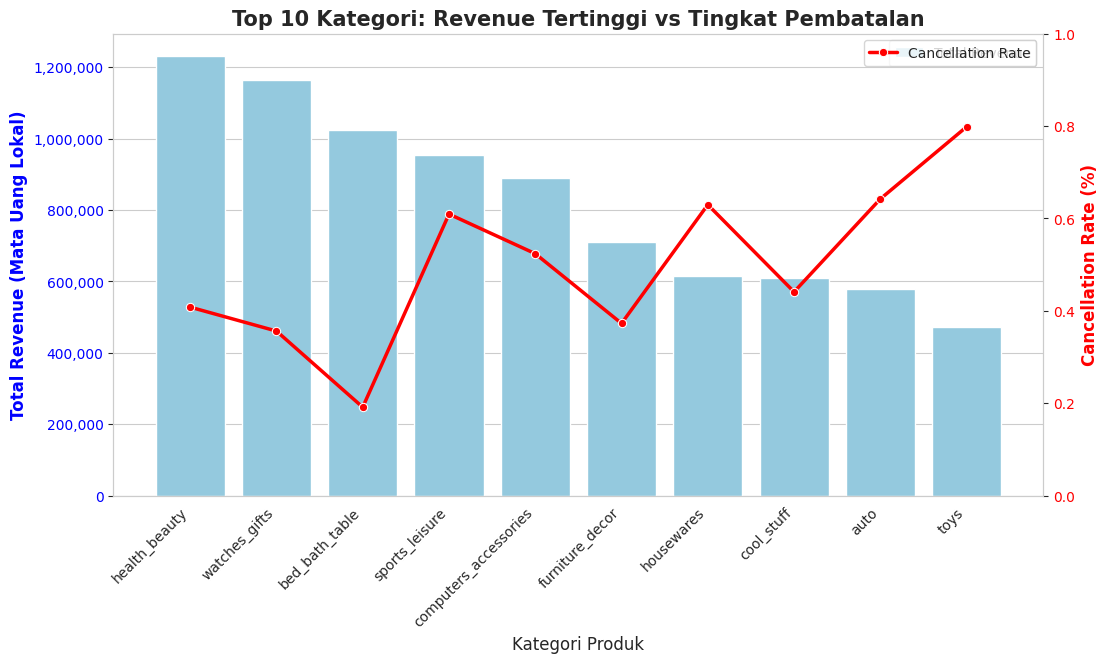

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
top_categories = q1_analysis.sort_values(by='Total Revenue', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='Total Revenue', data=top_categories,
            color='skyblue', ax=ax1, label='Total Revenue')
ax1.set_ylabel('Total Revenue (Mata Uang Lokal)', fontsize=12, fontweight='bold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Kategori Produk', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

ax2 = ax1.twinx()
sns.lineplot(x='product_category_name_english', y='Cancellation Rate (%)', data=top_categories,
             color='red', marker='o', linewidth=2.5, ax=ax2, label='Cancellation Rate')
ax2.set_ylabel('Cancellation Rate (%)', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1.0)

# Judul dan Layout
plt.title('Top 10 Kategori: Revenue Tertinggi vs Tingkat Pembatalan', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

### Pertanyaan 2:
Seberapa signifikan pengaruh keterlambatan pengiriman terhadap skor ulasan yang diberikan oleh pelanggan?

/tmp/ipython-input-2329631276.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='delivery_status', y='review_score', data=df_q2,


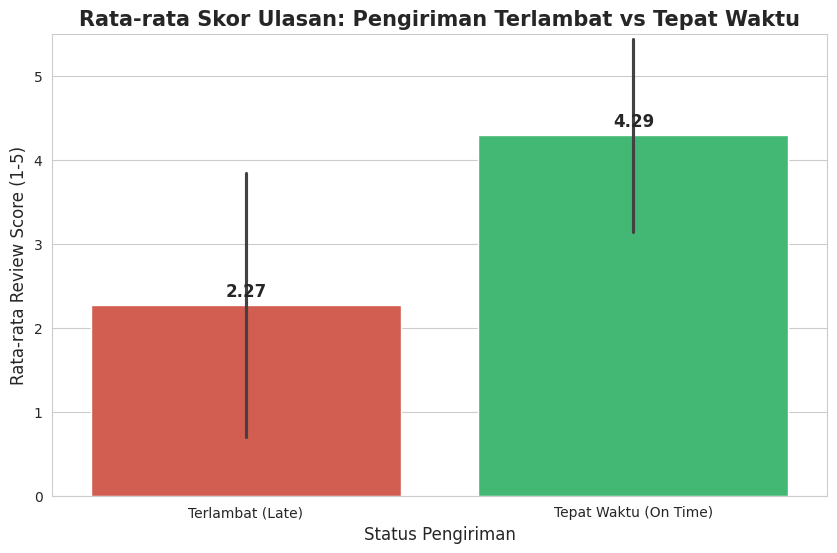

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Tentukan urutan warna: Hijau untuk Tepat Waktu, Merah untuk Terlambat
colors = ["#e74c3c", "#2ecc71"] # Merah, Hijau
order = ['Terlambat (Late)', 'Tepat Waktu (On Time)']

# Bar Plot dengan Error Bars (Confidence Interval)
ax = sns.barplot(x='delivery_status', y='review_score', data=df_q2,
                 order=order, palette=colors, estimator='mean', errorbar='sd')

# Menambahkan label angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12, fontweight='bold')

plt.title('Rata-rata Skor Ulasan: Pengiriman Terlambat vs Tepat Waktu', fontsize=15, fontweight='bold')
plt.xlabel('Status Pengiriman', fontsize=12)
plt.ylabel('Rata-rata Review Score (1-5)', fontsize=12)
plt.ylim(0, 5.5) # Batas skor max 5
plt.show()

**Insight:**
1. Analisis Kategori Produk Unggulan dan Risiko
- Grafik dual-axis (Batang & Garis) menunjukkan hubungan antara besarnya pendapatan dengan stabilitas pesanan.
- Kategori "Health & Beauty" adalah tulang punggung pendapatan perusahaan, menyumbang revenue tertinggi secara konsisten.
- pelanggan "Bed, Bath, Table" sangat jarang membatalkan pesanan.
- Kategori seperti "Toys" dan "Auto", meskipun masuk Top 10 Revenue, memiliki garis merah yang menanjak (tingkat pembatalan lebih tinggi, mendekati 0.8%).

2. Analisis Pengaruh Logistik terhadap Kepuasan
- Grafik batang menunjukkan perbedaan drastis dalam kepuasan pelanggan berdasarkan ketepatan waktu pengiriman.
- Pelanggan yang menerima paket tepat waktu memberikan rata-rata skor 4.29 / 5.0.
- Pelanggan yang mengalami keterlambatan hanya memberikan skor 2.27 / 5.0.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Analisis menunjukkan bahwa Health & Beauty serta Watches & Gifts menjadi kontributor utama pendapatan, namun belum tentu paling efisien. Kategori Bed, Bath, Table merupakan kategori paling optimal karena mampu menghasilkan pendapatan tinggi dengan tingkat pembatalan terendah, mencerminkan manajemen stok dan informasi produk yang sangat baik. Sebaliknya, kategori Toys dan Auto memiliki risiko operasional lebih tinggi akibat tingkat pembatalan yang relatif besar, sehingga memerlukan perbaikan pada pengelolaan inventori dan kejelasan deskripsi produk.
- Conclution pertanyaan 2
Keterlambatan pengiriman bukan sekadar masalah logistik, melainkan pembunuh reputasi. Keterlambatan menurunkan persepsi kualitas layanan hampir 50%.

In [74]:
import pandas as pd
all_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df = pd.merge(
    left=all_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

all_df = pd.merge(
    left=all_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

all_df = pd.merge(
    left=all_df,
    right=order_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df['product_category_name_english'] = all_df['product_category_name_english'].fillna(all_df['product_category_name'])
all_df['product_category_name_english'] = all_df['product_category_name_english'].fillna("Unknown")

relevant_columns = [
    'order_id',
    'order_status',
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'product_category_name_english',
    'price',
    'review_score'
]

final_df = all_df[relevant_columns]

final_df.to_csv("all_data.csv", index=False)